In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl

from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text



class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent, width, height, fontsize,trans):
        tx = Text(width/2., height/2, tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]
    
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from scipy.stats import linregress 
import matplotlib.pyplot as plt 
%matplotlib inline 
from scipy.spatial import distance 
from scipy.stats import nbinom
from sklearn.neighbors import KNeighborsRegressor 
import statsmodels.formula.api as smf 
import statsmodels.api as sm
import statsmodels.graphics as smg
import patsy
import math
from statsmodels.api import graphics
import seaborn as sns
sns.set(style='ticks', color_codes=True)

#import os
#os.environ['PATH']

In [18]:
def add_percentage_from_total(total, ax):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        perc_len = (len(percentage) * 2.5) / 100
        if perc_len > p.get_width() / 2:
            x = p.get_x()
        else:
            x = p.get_x() + (p.get_width() - perc_len) / 2
#         x = p.get_x() + p.get_width() / 2 - diff
        y = p.get_y() + p.get_height() + 0.03
        ax.annotate(percentage, (x, y))
        
def add_percentage(df, ax):    
    total = df['count'].sum()
    add_percentage_from_total(total, ax)
    
def add_percentage_from_array(ax, percentages):
    i = 0
    for p in ax.patches:
        percentage = '{:.1f}%'.format(percentages[i])
        i += 1
        perc_len = (len(percentage) * 2.5) / 100
        if perc_len > p.get_width() / 2:
            x = p.get_x()
        else:
            x = p.get_x() + (p.get_width() - perc_len) / 2
#         x = p.get_x() + p.get_width() / 2 - diff
        y = p.get_y() + p.get_height() + 0.03
        ax.annotate(percentage, (x, y))
        
def print_barplot(x, y, all_title, subplot_title, with_percentage=True, percentages=[]):

    sns.set(style="whitegrid")
    #sns.set_color_codes("Spectral")

    # source_data = pd.DataFrame(source_counts).reset_index()
    # flavor_data = pd.DataFrame(flavor_counts).reset_index()

    plt.figure(2, figsize=(25,15))
    the_grid = GridSpec(1, 1)

    plt.subplot(the_grid[0, 0],  title=subplot_title)
    ax=sns.barplot(x=x, y=y, palette='Spectral')
    plt.xlabel('')
    if with_percentage:
        if len(percentages) > 0:
            add_percentage_from_array(ax, percentages)
        else:
            add_percentage_from_total(sum(y), ax)
    
    plt.suptitle(all_title, fontsize=16)
    plt.show()

In [3]:
data1 = pd.read_csv('post_processed3.csv', encoding='utf-8')
data1.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
data1['is_student'].value_counts()

student       115
no_student     46
Name: is_student, dtype: int64

In [5]:
number_columns = ['tot_install_apps', 'nr_install_games',
       'nr_purchase_goods_apps', 'nr_pay_sub_apps', 'nr_banks_apps',
       'nr_social_net_apps', 'nr_installed_payment_systems']

In [6]:
data1[number_columns].describe()

,tot_install_apps,nr_install_games,nr_purchase_goods_apps,nr_pay_sub_apps,nr_banks_apps,nr_social_net_apps,nr_installed_payment_systems
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,34.683230,5.267081,3.583851,1.372671,1.689441,4.552795,1.204969
std,29.303034,7.666288,4.082828,1.906633,1.858212,2.848027,1.854447
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,15.000000,0.000000,1.000000,0.000000,1.000000,3.000000,0.000000
50%,30.000000,3.000000,2.000000,1.000000,1.000000,4.000000,1.000000
75%,50.000000,5.000000,5.000000,2.000000,2.000000,6.000000,2.000000
max,190.000000,50.000000,24.000000,12.000000,18.000000,15.000000,15.000000


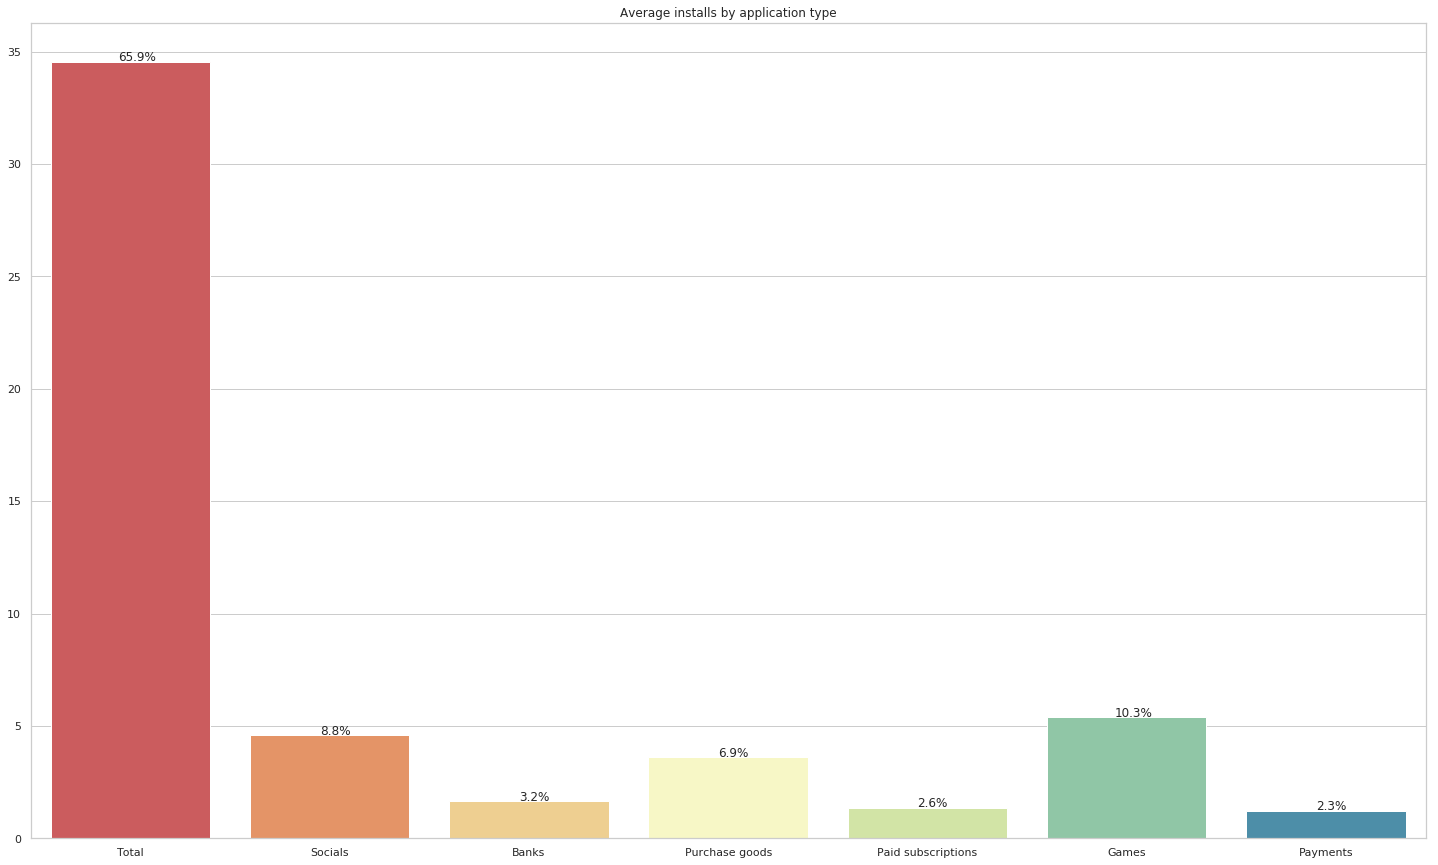

In [7]:
print_barplot(x=['Total', 'Socials', 'Banks', 'Purchase goods', 'Paid subscriptions', 'Games', 'Payments'], 
              y=[34.55,    4.59,      1.66,    3.62,            1.36,                    5.38, 1.23], 
              all_title='', 
              subplot_title='Average installs by application type')

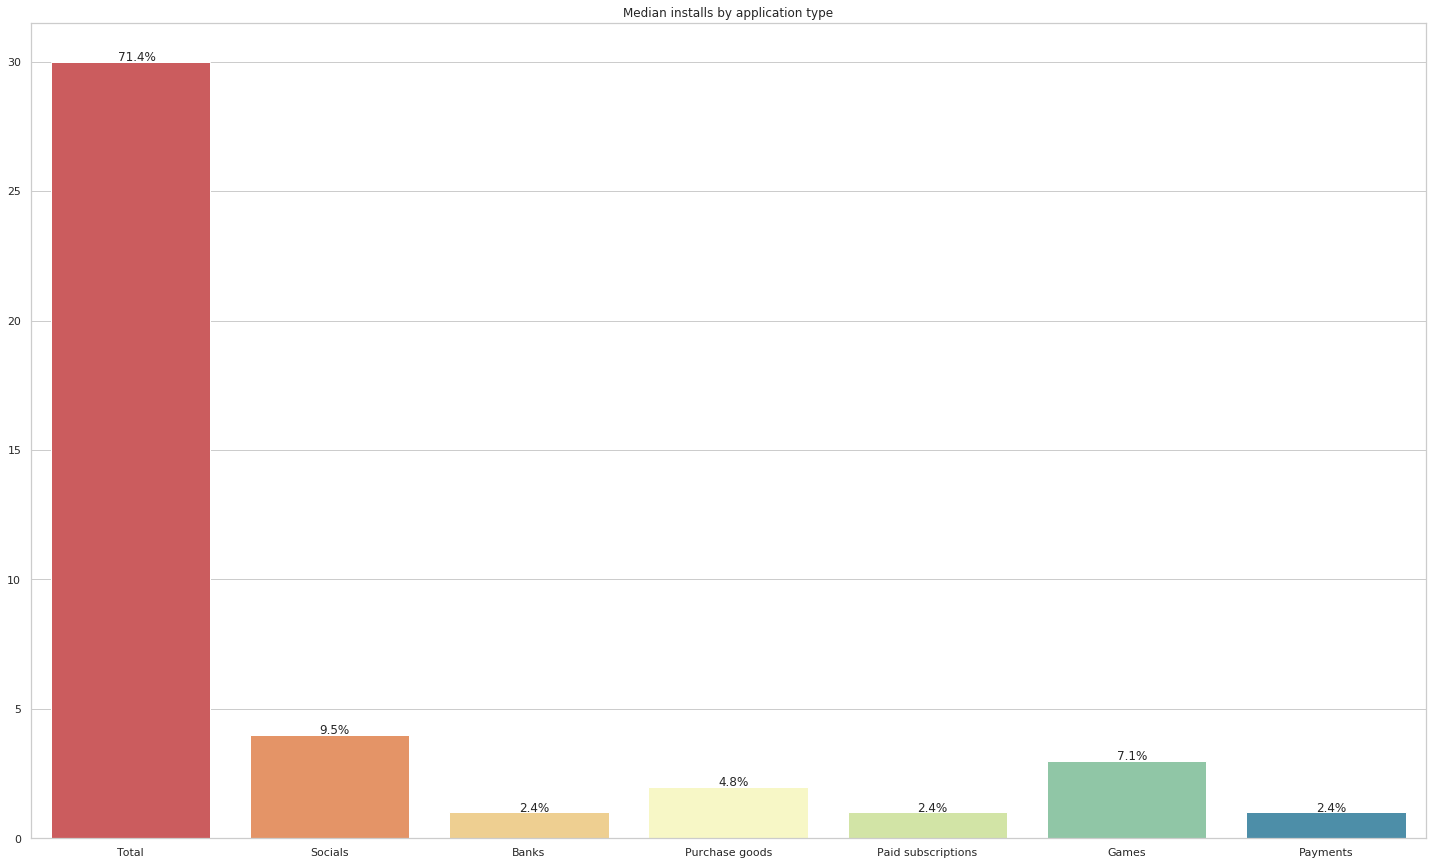

In [8]:
print_barplot(x=['Total', 'Socials', 'Banks', 'Purchase goods', 'Paid subscriptions', 'Games', 'Payments'], 
              y=[30,       4,         1,      2,                1,                     3,       1], 
              all_title='', 
              subplot_title='Median installs by application type')

In [9]:
data1[data1['is_student'] == 'student'][number_columns].describe()

,tot_install_apps,nr_install_games,nr_purchase_goods_apps,nr_pay_sub_apps,nr_banks_apps,nr_social_net_apps,nr_installed_payment_systems
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.00000
mean,36.826087,5.434783,3.747826,1.260870,1.539130,4.843478,1.13913
std,30.904851,8.054780,4.414576,1.854757,1.409784,2.808481,1.85381
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,15.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.00000
50%,30.000000,3.000000,2.000000,1.000000,1.000000,5.000000,1.00000
75%,50.000000,6.000000,5.000000,2.000000,2.000000,6.000000,2.00000
max,190.000000,50.000000,24.000000,12.000000,10.000000,15.000000,15.00000


In [10]:
data1[data1['is_student'] != 'student'][number_columns].describe()

,tot_install_apps,nr_install_games,nr_purchase_goods_apps,nr_pay_sub_apps,nr_banks_apps,nr_social_net_apps,nr_installed_payment_systems
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,29.326087,4.847826,3.173913,1.652174,2.065217,3.826087,1.369565
std,24.338405,6.659888,3.107728,2.024488,2.653318,2.846474,1.866175
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,15.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000
50%,20.000000,2.500000,2.500000,1.000000,1.000000,3.500000,1.000000
75%,35.750000,5.000000,5.000000,2.000000,2.750000,5.000000,2.000000
max,120.000000,30.000000,15.000000,10.000000,18.000000,15.000000,10.000000


In [11]:
data1['compensation_share_data'].value_counts()

depends     107
yes_pay      31
never        14
yes_free      9
Name: compensation_share_data, dtype: int64

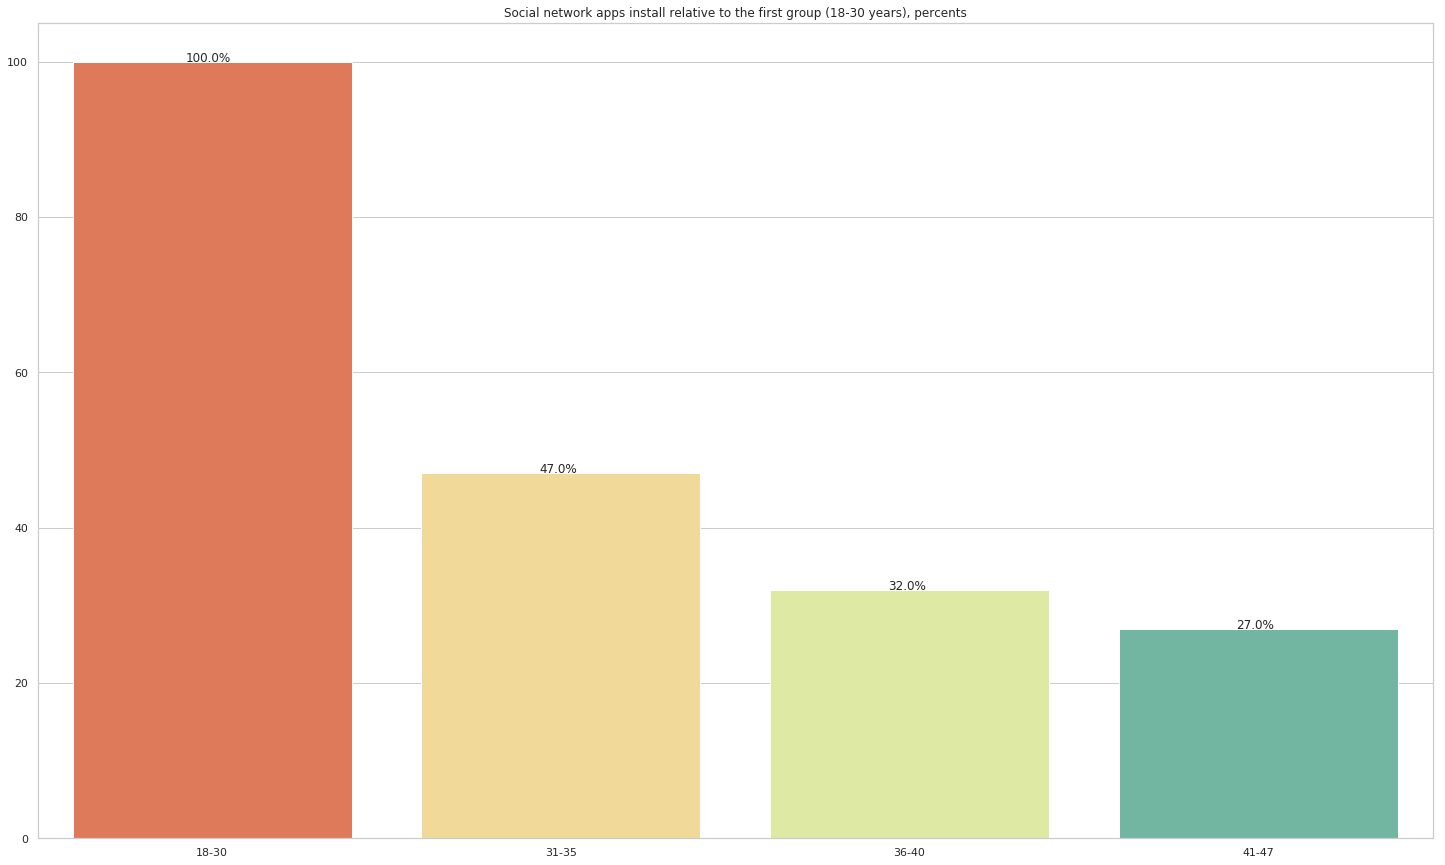

In [19]:
print_barplot(x=['18-30', '31-35', '36-40', '41-47'], 
              y=[100,       47,    32,    27], 
              all_title='', 
              subplot_title='Social network apps install relative to the first group (18-30 years), percents',
              with_percentage=True, percentages=[100, 47, 32, 27])